Population Change Project

In [67]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pingouin as pg


In [77]:
population_df = pd.read_csv("population.csv")

In [76]:
#Statistical Associations
summary_stats = population_df[['Births', 'Deaths', 'Net International Migration']].describe()
print(summary_stats)

             Births        Deaths  Net International Migration
count  1.030930e+05  1.030930e+05                 9.786100e+04
mean   4.515189e+03  2.733215e+03                 9.922823e+02
std    1.359824e+05  7.877657e+04                 3.020754e+04
min    0.000000e+00  0.000000e+00                -6.061000e+03
25%    1.180000e+02  1.070000e+02                 2.000000e+00
50%    3.080000e+02  2.530000e+02                 1.000000e+01
75%    8.990000e+02  6.600000e+02                 5.900000e+01
max    3.682013e+07  2.093430e+07                 7.478078e+06


### This Statistical association shows me that births and deaths have higher average values compared to migration, suggesting that natural population growth (births minus deaths) are higher contributors to overall population change.

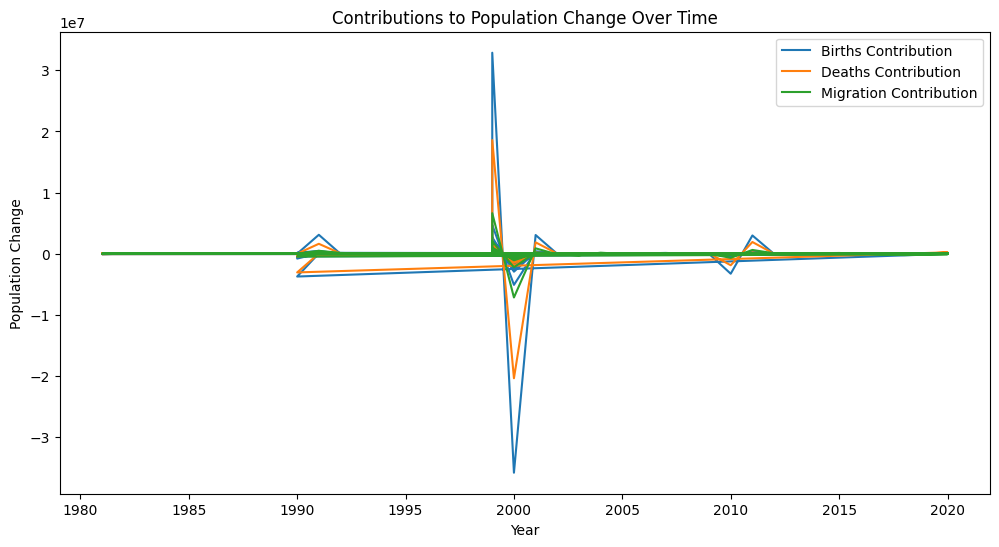

In [75]:
# Temporal Analysis
population_df['Births Contribution'] = population_df['Births'].diff().fillna(0)
population_df['Deaths Contribution'] = population_df['Deaths'].diff().fillna(0)
population_df['Migration Contribution'] = population_df['Net International Migration'].diff().fillna(0)

# Visualize contributions over time
plt.figure(figsize=(12, 6))

plt.plot(population_df['Year'], population_df['Births Contribution'], label='Births Contribution')
plt.plot(population_df['Year'], population_df['Deaths Contribution'], label='Deaths Contribution')
plt.plot(population_df['Year'], population_df['Migration Contribution'], label='Migration Contribution')

plt.title('Contributions to Population Change Over Time')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.legend()
plt.show()

### This temporal analysis visualization shows me that during the 1990s, births and deaths had a significant rise and fall, while migration stayed at 0. Similarly, in 2000, all three categories had a rise and fall, and again in 2010. Overall, migration seems to have been moving in an upward trend at the most constant rate in comparison to births and deaths. Migration was the most significant factor in population.

In [78]:
#Casual Hypothesis
correlation_births = pg.corr(population_df['Births'], population_df['Residual'])
correlation_deaths = pg.corr(population_df['Deaths'], population_df['Residual'])
correlation_migration = pg.corr(population_df['Net International Migration'], population_df['Residual'])
print("Correlation Result - Births and Population Change:")
print(correlation_births)
print("\nCorrelation Result - Deaths and Population Change:")
print(correlation_deaths)
print("\nCorrelation Result - Net International Migration and Population Change:")
print(correlation_migration)

Correlation Result - Births and Population Change:
              n         r         CI95%  p-val BF10  power
pearson  103093  0.140028  [0.13, 0.15]    0.0  inf    1.0

Correlation Result - Deaths and Population Change:
              n         r         CI95%  p-val BF10  power
pearson  103093  0.144618  [0.14, 0.15]    0.0  inf    1.0

Correlation Result - Net International Migration and Population Change:
             n        r         CI95%  p-val BF10  power
pearson  97861  0.12443  [0.12, 0.13]    0.0  inf    1.0


### This casual hypothesis tells me that the correlation analysis reveals significant (positive) correlations between population change and births (r = 0.140), deaths (r = 0.145), and migration (r = 0.124). In conclusion, all three correlations are highly significant and none is more or less significant than the other (or there is not a large enough gap between their influences to population).

### In Conclusion: I believe that birth, death and migration play an equally significant role in population and changes. This is due to their statistical association determining births and deaths as greater contributors to population change, while temporal analysis determined migration as the greatest contributor. Thirdly, casual hypothesis determined that all three have are equally significant contributors to population. Finally, I can conclude that all three have an equally significant effect on population change. 